In [65]:
# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import re

In [2]:
# THINGS TO DO
# format mean and median incomes to float values
# format earnings by education level
# format earnings by occupation
    # >> merge files for each year
    # >> analyze trajectory for each category
# fix age column in loan data
# append other loan/debt info from files
# import cost of living data in a usable format

In [3]:
# import data containing mean income for each age in 2019
mean_income = pd.read_csv('data/mean-income-by-age-2019.csv')
mean_income.columns = ['age', 'mean_income']
mean_income

,age,mean_income
0,18,"$8,419.92"
1,19,"$13,484.63"
2,20,"$17,456.99"
3,21,"$21,927.80"
4,22,"$23,680.10"
...,...,...
58,76,"$68,950.29"
59,77,"$57,016.60"
60,78,"$69,880.52"
61,79,"$56,169.67"


In [4]:
# import data containing median income for each age in 2019
median_income = pd.read_csv('data/median-income-by-age-2019.csv')
median_income.columns = ['age', 'median_income']
median_income

,age,median_income
0,18,"$5,000.00"
1,19,"$10,000.00"
2,20,"$14,438.00"
3,21,"$18,000.00"
4,22,"$18,501.00"
...,...,...
58,76,"$49,147.00"
59,77,"$40,800.00"
60,78,"$38,460.00"
61,79,"$39,914.00"


In [5]:
# merge median and mean income to single df
income_by_age = pd.merge(median_income, mean_income)
income_by_age

,age,median_income,mean_income
0,18,"$5,000.00","$8,419.92"
1,19,"$10,000.00","$13,484.63"
2,20,"$14,438.00","$17,456.99"
3,21,"$18,000.00","$21,927.80"
4,22,"$18,501.00","$23,680.10"
...,...,...,...
58,76,"$49,147.00","$68,950.29"
59,77,"$40,800.00","$57,016.60"
60,78,"$38,460.00","$69,880.52"
61,79,"$39,914.00","$56,169.67"


In [6]:
# import student load balance by age group
loan_balance_by_year = pd.read_csv('data/loan-balance-by-age.csv')
loan_balance_by_year

,Year,under30,30_39,40_49,50_59,60+,unknown
0,2004,146.0,114.0,49.2,30.9,6.1,0.90
1,2005,161.0,129.0,55.6,38.3,8.2,0.70
2,2006,194.0,154.0,69.4,47.9,13.2,0.30
3,2007,217.0,171.0,81.7,55.4,15.8,0.40
4,2008,248.0,202.0,95.7,67.1,20.0,0.50
5,2009,273.0,229.0,109.0,77.7,25.0,0.70
6,2010,299.0,257.0,127.0,90.5,29.1,0.90
7,2011,312.0,281.0,140.0,97.2,35.2,0.90
8,2012,320.0,320.0,163.0,113.0,42.6,1.30
9,2013,356.0,354.0,184.0,126.0,49.4,1.60


In [7]:
#x1 = pd.melt(loan_balance_by_year)
x1 = loan_balance_by_year.transpose()
x1.columns = [str(int(year))+'LB' for year in x1.loc['Year']]
x1 = x1.iloc[1:]
x1 = x1.iloc[:-1]
x1.index = [18, 30, 40, 50, 60]
xplot = x1.copy()
x1['age'] = x1.index
x1 = x1.reindex(range(18,81,1))
x1 = x1.fillna(method='ffill')
loan_balance_by_year = x1.copy()
loan_balance_by_year

,2004LB,2005LB,2006LB,2007LB,2008LB,2009LB,2010LB,2011LB,2012LB,2013LB,2014LB,age
18,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
19,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
20,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
21,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
22,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,6.1,8.2,13.2,15.8,20.0,25.0,29.1,35.2,42.6,49.4,58.0,60.0
77,6.1,8.2,13.2,15.8,20.0,25.0,29.1,35.2,42.6,49.4,58.0,60.0
78,6.1,8.2,13.2,15.8,20.0,25.0,29.1,35.2,42.6,49.4,58.0,60.0
79,6.1,8.2,13.2,15.8,20.0,25.0,29.1,35.2,42.6,49.4,58.0,60.0


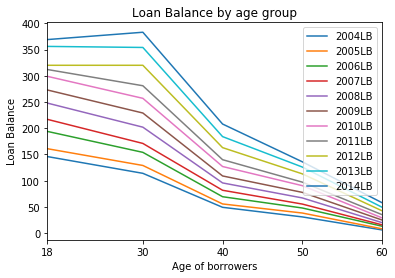

In [8]:
xplot.plot()
plt.xticks([18, 30, 40, 50, 60])
plt.xlabel('Age of borrowers')
plt.ylabel('Loan Balance')
plt.title('Loan Balance by age group')
plt.show()

In [9]:
loan_data = pd.merge(income_by_age, loan_balance_by_year)
loan_data['age']

0     18
1     18
2     18
3     18
4     18
      ..
58    60
59    60
60    60
61    60
62    60
Name: age, Length: 63, dtype: int64

In [10]:
# read earnings by education level
earnings_edu = pd.read_csv('data/earnings-by-education-level.csv')
earnings_edu

,GEO_ID,NAME,S2001_C01_001E,S2001_C01_001M,S2001_C02_001E,S2001_C02_001M,S2001_C03_001E,S2001_C03_001M,S2001_C04_001E,S2001_C04_001M,...,S2001_C02_020E,S2001_C02_020M,S2001_C03_020E,S2001_C03_020M,S2001_C04_020E,S2001_C04_020M,S2001_C05_020E,S2001_C05_020M,S2001_C06_020E,S2001_C06_020M
0,id,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total MOE!!Population 16 year...,Estimate!!Percent!!Population 16 years and ove...,Margin of Error!!Percent MOE!!Population 16 ye...,Estimate!!Male!!Population 16 years and over w...,Margin of Error!!Male MOE!!Population 16 years...,Estimate!!Percent Male!!Population 16 years an...,Margin of Error!!Percent Male MOE!!Population ...,...,Estimate!!Percent!!MEDIAN EARNINGS BY EDUCATIO...,Margin of Error!!Percent MOE!!MEDIAN EARNINGS ...,Estimate!!Male!!MEDIAN EARNINGS BY EDUCATIONAL...,Margin of Error!!Male MOE!!MEDIAN EARNINGS BY ...,Estimate!!Percent Male!!MEDIAN EARNINGS BY EDU...,Margin of Error!!Percent Male MOE!!MEDIAN EARN...,Estimate!!Female!!MEDIAN EARNINGS BY EDUCATION...,Margin of Error!!Female MOE!!MEDIAN EARNINGS B...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female MOE!!MEDIAN EA...
1,0100000US,United States,172894743,167288,172894743,167288,90746725,100045,90746725,100045,...,(X),(X),91217,265,(X),(X),61737,137,(X),(X)


In [ ]:
# read earnings by occupation category
#eventually loop through folder to read in files
#each file corresponds to t a single year of occupation data (2010-2018)


In [1]:
# create uniform column labels to apply to ocup dfs
import string 
alpha = list(string.ascii_lowercase)
alpha2 = alpha[:]
ebo_cols = alpha[:]
for x in alpha:
    for j in alpha2:
        ebo_cols.append(x+j)
ebo_cols = alpha[:] + ebo_cols[:ebo_cols.index('iw')]
ebo_cols[-1]

NameError: name 'string' is not defined

'iv'

In [114]:
from glob import glob
filenames = glob('data/earnings-by-occupation/*.csv')
ebo_dfs = []
for f in filenames:
    df = pd.read_csv(f)
    df.columns = df.iloc[0]
    df['filename'] = str(f)
    ebo_dfs.append(df)

earnings_by_ocup = ebo_dfs[0]
print(type(earnings_by_ocup))


earnings_by_ocup = pd.concat(ebo_dfs)
earnings_by_ocup = earnings_by_ocup.loc[1]
earnings_by_ocup = earnings_by_ocup.reset_index()

#FIND correct year
earnings_by_ocup['year'] = earnings_by_ocup['filename'].str.slice(35,39)
earnings_by_ocup = earnings_by_ocup.set_index('year')
#earnings_by_ocup = earnings_by_ocup[earnings_by_ocup.columns[1:]]

earnings_by_ocup



<class 'pandas.core.frame.DataFrame'>


/home/alhalarewicz/anaconda3/envs/SBEnv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,index,Geographic Area Name,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Employee of private company workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Federal government workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Local government workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Private not-for-profit wage and salary workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Self employed in own incorporated business workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!Self employed in own not incorporated business workers and unpaid family workers,Median earnings (dollars)!!Female!!Estimate!!CLASS OF WORKER!!State government workers,Median earnings (dollars)!!Female!!Estimate!!EDUCATIONAL ATTAINMENT!!Bachelor's degree,...,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!American Indian and Alaska Native,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Asian,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Black or African American,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Native Hawaiian and Other Pacific Islander,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Some other race,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!White,Women's earnings as a percentage of men's earnings!!Margin of Error!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races,"Women's earnings as a percentage of men's earnings!!Margin of Error!!White alone, not Hispanic or Latino",filename,id
year,,,,,,,,,,,,,,,,,,,,,
2010,1,United States,33430,53153,42792,41186,40792,23089,41571,40393,...,2.2,0.5,0.5,8.5,1.5,0.2,1.2,0.3,data/earnings-by-occupation/ACSST1Y2010.S2002_...,0100000US
2011,1,United States,34722,55305,43734,41455,41397,24445,42214,40645,...,2.2,2.1,0.7,6.1,1.5,0.3,1.4,0.2,data/earnings-by-occupation/ACSST1Y2011.S2002_...,0100000US
2012,1,United States,35230,55951,43715,41733,41851,24684,42609,40733,...,1.7,1.1,1.1,6.0,1.3,0.3,1.1,0.1,data/earnings-by-occupation/ACSST1Y2012.S2002_...,0100000US
2013,1,United States,35695,56753,44045,42713,43322,25596,43258,NaN,...,1.8,1.4,1.0,5.4,0.8,0.3,1.0,0.1,data/earnings-by-occupation/ACSST1Y2013.S2002_...,0100000US
2015,1,United States,36499,59801,45550,45331,46552,27089,45247,NaN,...,1.5,1.1,1.3,8.6,0.8,0.1,2.4,0.2,data/earnings-by-occupation/ACSST1Y2015.S2002_...,0100000US
2014,1,United States,36075,58066,44667,43584,43987,26712,44599,NaN,...,1.7,1.3,1.0,7.9,0.9,0.1,1.7,0.3,data/earnings-by-occupation/ACSST1Y2014.S2002_...,0100000US
2016,1,United States,37177,61229,46400,46381,47459,28012,46335,NaN,...,1.8,2.0,1.1,6.2,1.3,0.1,1.9,0.3,data/earnings-by-occupation/ACSST1Y2016.S2002_...,0100000US
2017,1,United States,38707,61804,47460,48512,50248,30194,47534,NaN,...,3.0,0.6,0.5,4.0,1.3,0.4,1.3,0.4,data/earnings-by-occupation/ACSST1Y2017.S2002_...,0100000US


In [79]:
import re
pattern = re.compile('/^\d{4}\.')
result = pattern.match('2014.hjs')
print(bool(result))
print(result)

False
None


In [ ]:
ebo2010 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2011 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2012 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2013 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2014 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2015 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2016 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2017 = pd.read_csv('data/earnings-by-occupation/ACSST1Y2011.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2011

In [ ]:
ebo2018= pd.read_csv('data/earnings-by-occupation/ACSST1Y2018.S2002_data_with_overlays_2019-11-12T144635.csv')
ebo2018